In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


In [20]:
metadata = pd.read_csv(f'Data/RNA_Disgenet_matrix_2_full.csv', index_col=0)

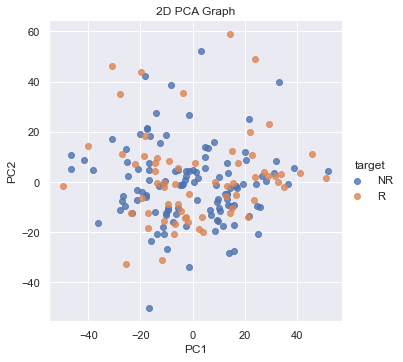

In [21]:
pca = PCA(n_components=2)
 
# Fit and transform data
pca_features = pca.fit_transform(metadata.iloc[:,1:1843])
 
# Create dataframe
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])
pca_df['target'] = pd.cut(metadata['PFS'], bins=[0, 6, np.inf], labels=['NR', 'R'])

sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 181 samples in 0.000s...
[t-SNE] Computed neighbors for 181 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 181 / 181
[t-SNE] Mean sigma: 24.716590
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.675362
[t-SNE] KL divergence after 1000 iterations: 0.867828


[Text(0.5, 1.0, 'T-SNE projection of original data')]

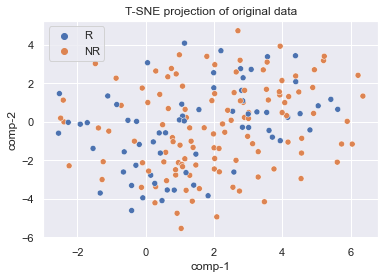

In [22]:
tsne = TSNE(n_components=2, verbose=1, random_state=42)
# print(metadata.iloc[:,1:1843])
z = tsne.fit_transform(metadata.iloc[:,1:1843]) 
df = pd.DataFrame()
df["y"] = pd.cut(metadata['PFS'], bins=[0, 6, np.inf], labels=['NR', 'R'])
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
plt.figure()
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
        data=df).set(title="T-SNE projection of original data") 

C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

Graph2Vec: 128 dimensions 900 epochs and 3 WL iterations
               KNN        RF        LR       SVM
MCC       0.121716  0.464758  0.518545  0.353553
F1-Score  0.285714  0.461538  0.666667  0.555556
AUC       0.627778  0.638889  0.811111  0.788889

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 181 samples in 0.000s...
[t-SNE] Computed neighbors for 181 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 181 / 181
[t-SNE] Mean sigma: 3.598895
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.444504
[t-SNE] KL divergence after 1000 iterations: 0.597335


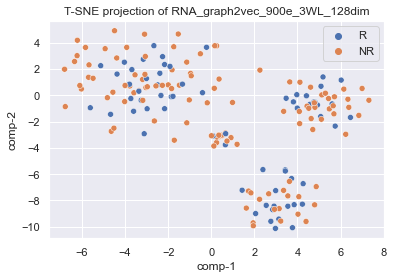

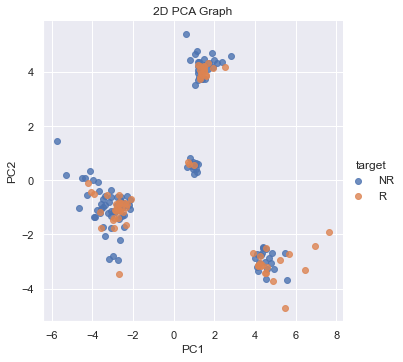

[[16  2]
 [ 8  2]]
[[18  0]
 [ 7  3]]
[[16  2]
 [ 4  6]]
[[15  3]
 [ 5  5]]
Graph2Vec: 128 dimensions 1000 epochs and 3 WL iterations
               KNN        RF        LR       SVM
MCC      -0.091287  0.372104  0.518545  0.337350
F1-Score  0.142857  0.333333  0.666667  0.500000
AUC       0.491667  0.763889  0.805556  0.794444

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 181 samples in 0.000s...
[t-SNE] Computed neighbors for 181 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 181 / 181
[t-SNE] Mean sigma: 3.581341
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.603882
[t-SNE] KL divergence after 1000 iterations: 0.587105


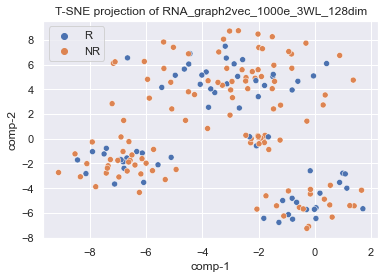

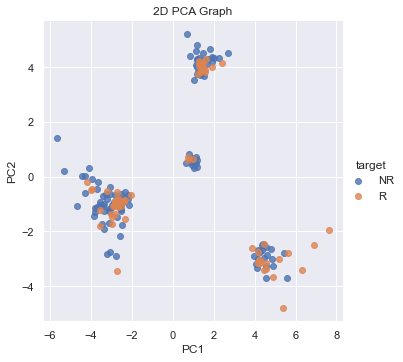

[[15  3]
 [ 9  1]]
[[18  0]
 [ 8  2]]
[[16  2]
 [ 4  6]]
[[16  2]
 [ 6  4]]
Graph2Vec: 128 dimensions 1200 epochs and 3 WL iterations
               KNN        RF        LR       SVM
MCC      -0.091287  0.258199  0.518545  0.430331
F1-Score  0.142857  0.181818  0.666667  0.588235
AUC       0.463889  0.644444  0.794444  0.800000

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 181 samples in 0.000s...
[t-SNE] Computed neighbors for 181 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 181 / 181
[t-SNE] Mean sigma: 3.561206
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.913239
[t-SNE] KL divergence after 1000 iterations: 0.589688


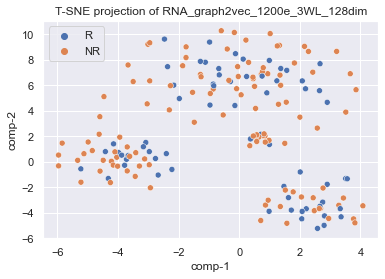

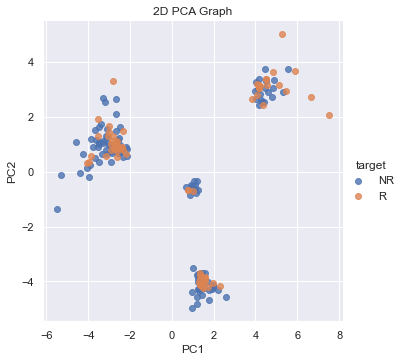

[[15  3]
 [ 9  1]]
[[18  0]
 [ 9  1]]
[[16  2]
 [ 4  6]]
[[16  2]
 [ 5  5]]
Graph2Vec: 128 dimensions 1400 epochs and 3 WL iterations
               KNN        RF        LR       SVM
MCC      -0.152911  0.223772  0.518545  0.444591
F1-Score  0.133333  0.307692  0.666667  0.631579
AUC       0.511111  0.716667  0.811111  0.805556

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 181 samples in 0.000s...
[t-SNE] Computed neighbors for 181 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 181 / 181
[t-SNE] Mean sigma: 3.555355
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.008102
[t-SNE] KL divergence after 1000 iterations: 0.608130


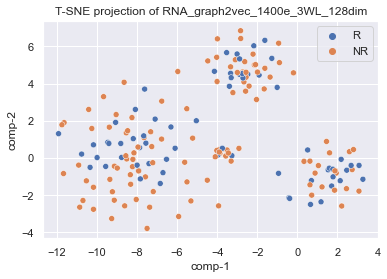

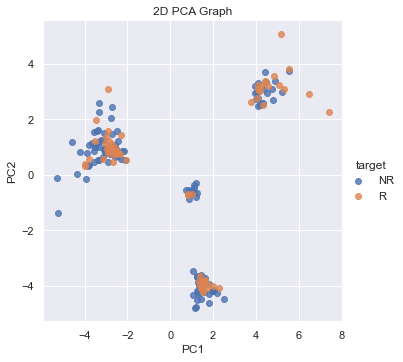

[[14  4]
 [ 9  1]]
[[17  1]
 [ 8  2]]
[[16  2]
 [ 4  6]]
[[15  3]
 [ 4  6]]


In [23]:
for e in [100, 200, 300, 400, 500, 600, 700, 900, 1000, 1200, 1400]:
        for dim in [128,256,512]:
                for wl in [2,3]:
                        embeddings = pd.read_csv(f'Results_2/RNA_graph2vec_{e}e_{wl}WL_{dim}dim.csv', index_col=0)
                       
                        metadata['PFS_label'] = pd.cut(metadata['PFS'], bins=[0, 6, np.inf], labels=['NR', 'R'])
                        results = pd.concat([embeddings, metadata[['PFS_label']]], axis=1)

                        x = results.drop(columns='PFS_label')
                        y = results['PFS_label']
                        scaler = StandardScaler()
                        scaler.fit(x)
                        x = scaler.transform(x)
                        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=42)

                        # Logistic Regression
                        clf = LogisticRegression(random_state=0)
                        clf.fit(x_train, y_train)
                        y_pred = clf.predict(x_test)
                        y_prob = clf.predict_proba(x_test)[:, 1]

                        lr_cm  = metrics.confusion_matrix(y_test, y_pred)
                        lr_mcc = metrics.matthews_corrcoef(y_test, y_pred)
                        lr_f1  = metrics.f1_score(y_test, y_pred, pos_label='R')
                        lr_auc = metrics.roc_auc_score(y_test, y_prob)

                        # Support Vector Machine
                        SVM = svm.SVC(kernel='linear', random_state=0, probability=True)
                        SVM.fit(x_train, y_train) 
                        y_pred = SVM.predict(x_test)
                        y_prob = SVM.predict_proba(x_test)[:, 1]

                        svm_cm  = metrics.confusion_matrix(y_test, y_pred)
                        svm_mcc = metrics.matthews_corrcoef(y_test, y_pred)
                        svm_f1  = metrics.f1_score(y_test, y_pred, pos_label='R')
                        svm_auc = metrics.roc_auc_score(y_test, y_prob)

                        #KNN
                        KNN = KNeighborsClassifier(n_neighbors=4)
                        KNN.fit(x_train,y_train)
                        y_pred = KNN.predict(x_test)
                        y_prob = KNN.predict_proba(x_test)[:, 1]

                        knn_cm  = metrics.confusion_matrix(y_test, y_pred)
                        knn_mcc = metrics.matthews_corrcoef(y_test, y_pred)
                        knn_f1  = metrics.f1_score(y_test, y_pred, pos_label='R')
                        knn_auc = metrics.roc_auc_score(y_test, y_prob)

                        # Random forest
                        RF = RandomForestClassifier(random_state = 0)
                        RF.fit(x_train,y_train)
                        y_pred = RF.predict(x_test)
                        y_prob = RF.predict_proba(x_test)[:, 1]

                        rf_cm  = metrics.confusion_matrix(y_test, y_pred)
                        rf_mcc = metrics.matthews_corrcoef(y_test, y_pred)
                        rf_f1  = metrics.f1_score(y_test, y_pred, pos_label='R')
                        rf_auc = metrics.roc_auc_score(y_test, y_prob)
                        # print(cm)
                        # print('MCC:', round(lr_mcc, 4))
                        # print('F1:', round(lr_f1, 4))
                        # print('AUC:', round(lr_auc, 4))
                        r = {
                                'KNN':[knn_mcc, knn_f1, knn_auc],
                                'RF':[rf_mcc, rf_f1, rf_auc],
                                'LR':[lr_mcc, lr_f1, lr_auc],
                                'SVM':[svm_mcc, svm_f1, svm_auc]
                        }
                       
                        if knn_f1 > 0.65 or rf_f1 > 0.65 or lr_f1 > 0.65  or svm_f1 > 0.65 :
                                print(f'Graph2Vec: {dim} dimensions {e} epochs and {wl} WL iterations')
                                Report = pd.DataFrame(data=r, index = ['MCC','F1-Score', 'AUC'])
                                print(pd.DataFrame(Report).head())
                                print()
                                tsne = TSNE(n_components=2, verbose=1, random_state=123)
                                z = tsne.fit_transform(x) 
                                df = pd.DataFrame()
                                df["y"] = y
                                df["comp-1"] = z[:,0]
                                df["comp-2"] = z[:,1]
                                plt.figure()
                                sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                                        data=df).set(title=f'T-SNE projection of RNA_graph2vec_{e}e_{wl}WL_{dim}dim') 
                                
                                pca = PCA(n_components=2)
 
                                # Fit and transform data
                                pca_features = pca.fit_transform(x)
                                
                                # Create dataframe
                                pca_df = pd.DataFrame(
                                        data=pca_features, 
                                        columns=['PC1', 'PC2'])
                                pca_df['target'] = y

                                sns.set()                                
                                sns.lmplot(
                                        x='PC1', 
                                        y='PC2', 
                                        data=pca_df, 
                                        hue='target', 
                                        fit_reg=False, 
                                        legend=True
                                        )
                                
                                plt.title('2D PCA Graph')
                                plt.show()
                                
                                print(knn_cm)
                                print(rf_cm)
                                print(lr_cm)
                                print(svm_cm)


C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


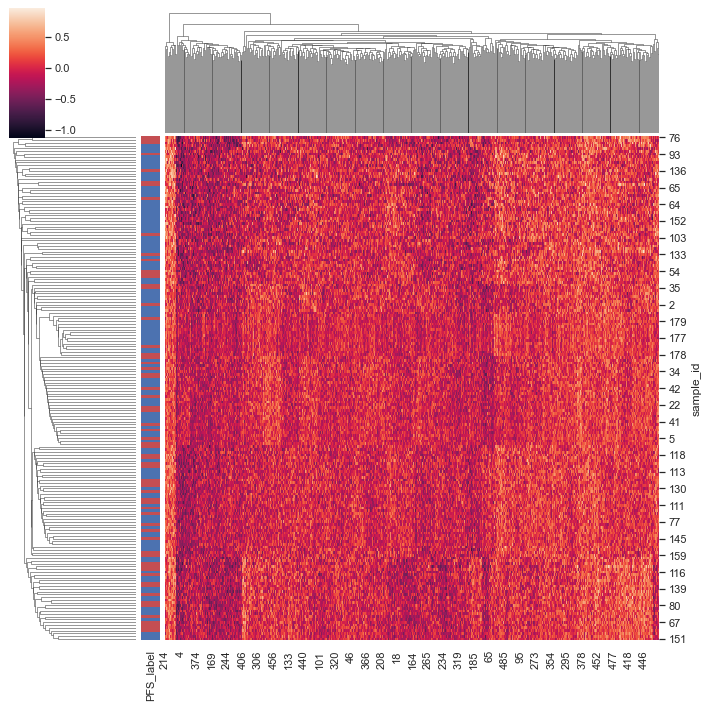

In [24]:
lut = dict(zip(results['PFS_label'].unique(), "rbg"))
row_colors = results['PFS_label'].map(lut)
sns.clustermap(embeddings, col_cluster=True, row_colors=row_colors)